# Happy & Sad CLASSIFICATION

This notebook covers:
- Loading the data
- Simple EDA and an example of feature enginnering
- Data preprocessing and data wrangling
- Creating a simple model
- Making a submission
- Some tips for improving your score

## Importing Neccessary Libraries

In [1]:
import os
import cv2
import imghdr
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20656\2356175121.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

### Avoiding ERRORS

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

## Removing Dodgy images

In [4]:
image_exts = ['jpeg','jpg','bmp','png']

In [5]:
image_exts[0]

'jpeg'

In [8]:
os.listdir(data_dir)

['Happy', 'sad']

In [9]:
#### To check all the images in the cat folder

In [11]:
os.listdir(os.path.join(data_dir,'sad'))

['211543075-a-man-sits-alone-on-a-bench-in-the-fog.jpg',
 '213284439-lonely-man-in-dim-room-generative-ai.jpg',
 '2ad50fbc7f1ffcc74cb7e569b856758d.jpg',
 '353397713.jpg',
 '360_F_383107772_O9RmYfXrKwQN5sa5XaV2u3zarhk6P2te.jpg',
 '360_F_548848756_IlV9Y9HV8chb6mSuc3PBamYRT9gIn8Vo.jpg',
 '360_F_573380015_l5YdjSZuJqET7UWOHBVMhzT7J63O8hPq.jpg',
 '360_F_601507482_RbV0Vk2KSg72LkjkSZBJNpmxu6Y4Hdzw.jpg',
 '509644-Alone-Emo-emotion-loneliness-lonely-mood-People.jpg',
 '5acf9ed1146e711e008b46d7.jpg',
 '73705bd7debb66c2afc780a22c223804.jpg',
 '7RNXwSxCAKL8vGtXG2ZkyD-1200-80.jpg',
 '8iAb9k4aT.jpg',
 '960x0.jpg',
 'dark-depression-mood-people-wallpaper-preview.jpg',
 'dark-depression-mood-people-wallpaper-preview2.jpg',
 'DealingwithDepressionwithoutMedication-1.jpg',
 'depositphotos_19568511-stock-photo-teenage-girl-looking-thoughtful-about.jpg',
 'depositphotos_210655610-stock-photo-sad-man-sitting-floor-home.jpg',
 'depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg',
 'depressed-person-sta

In [12]:
os.listdir(os.path.join(data_dir,'Happy'))

['05-12-21-happy-people.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '170404-happy-workers-feature.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '2016-01-04-1451880335-5503640-thedailyhabitsofsupremelyhappypeople.jpg',
 '2560px-Happy_People.jpg',
 '31418025-diverse-happy-people.jpg',
 '35438_hd.jpg',
 '360_F_261529596_YZWJaMnYFSCM0FSCrxs71o6RrZ9MpP4D.jpg',
 '360_F_313450534_bHkt5SoetREYpgWO5uOpceVnaDCngOX7.jpg',
 '360_F_324810244_4pLFdBBn9Cc7nywaugt84lrANmmgwDUr.jpg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '427394C200000578-0-image-a-24_1500384481554.jpg',
 '53c0f3ee54f37727d1ac6fda50f7a59d.jpg',
 '7-Habits-of-Happy-People.png',
 '89ca5d41335b4f9207b9cf03538a7dbd63497e474912837562cb9f58809ac32f.png',
 '8cEbMbgxi.jpg',
 '8e06de1bf2171da2312b6de61c61e4bc.jpg',
 '9b65a25adca61c48bcb01370116723e3.jpg',
 'A_Sep20_14_1189155141.jpg',
 'business-happy-people-vector-21811131.jpg',
 'community-young-people-happy-together_23-2148431416.jpg',
 'compassion.jpg',
 'd

In [13]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            #os.remove(image_path)

Image not in ext listC:\Users\ADMIN\Documents\ComputerVision_Projects\Happy&Sad\Image\Happy\427394C200000578-0-image-a-24_1500384481554.jpg
Image not in ext listC:\Users\ADMIN\Documents\ComputerVision_Projects\Happy&Sad\Image\Happy\7-Habits-of-Happy-People.png
Image not in ext listC:\Users\ADMIN\Documents\ComputerVision_Projects\Happy&Sad\Image\Happy\depositphotos_317939792-stock-photo-young-woman-isolated-yellow-background.jpg
Image not in ext listC:\Users\ADMIN\Documents\ComputerVision_Projects\Happy&Sad\Image\Happy\depositphotos_391577690-stock-photo-cheerful-woman-outstretched-hands-sitting.jpg
Image not in ext listC:\Users\ADMIN\Documents\ComputerVision_Projects\Happy&Sad\Image\Happy\depositphotos_53010223-stock-photo-free-happy-girl-on-beach.jpg
Image not in ext listC:\Users\ADMIN\Documents\ComputerVision_Projects\Happy&Sad\Image\sad\depositphotos_19568511-stock-photo-teenage-girl-looking-thoughtful-about.jpg
Image not in ext listC:\Users\ADMIN\Documents\ComputerVision_Projects\H

In [14]:
tf.data.Dataset??

## Loading Datasets

In [88]:
data_dir = r'C:\Users\ADMIN\Documents\ComputerVision_Projects\Happy&Sad\Image'


In [15]:
#Building Data pipeline
data = tf.keras.utils.image_dataset_from_directory(data_dir)#,shuffle=True)

Found 165 files belonging to 2 classes.


In [16]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
 #Building Data pipeline
data_iterator = data.as_numpy_iterator()

In [18]:
# Acessing Datapipeline
batch = data_iterator.next()
len(batch)

2

In [19]:
batch[0].shape

(32, 256, 256, 3)

In [21]:
#Class 1 = sad
#Class 0 = Happy
batch[1]

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [22]:
# Convert the features array into a DataFrame
df_features = pd.DataFrame(batch[1])
print(df_features)

    0
0   1
1   0
2   0
3   0
4   1
5   0
6   1
7   1
8   1
9   1
10  1
11  0
12  0
13  1
14  0
15  0
16  0
17  0
18  1
19  0
20  0
21  0
22  1
23  0
24  0
25  1
26  1
27  0
28  1
29  1
30  0
31  1


## Visualizing dataset

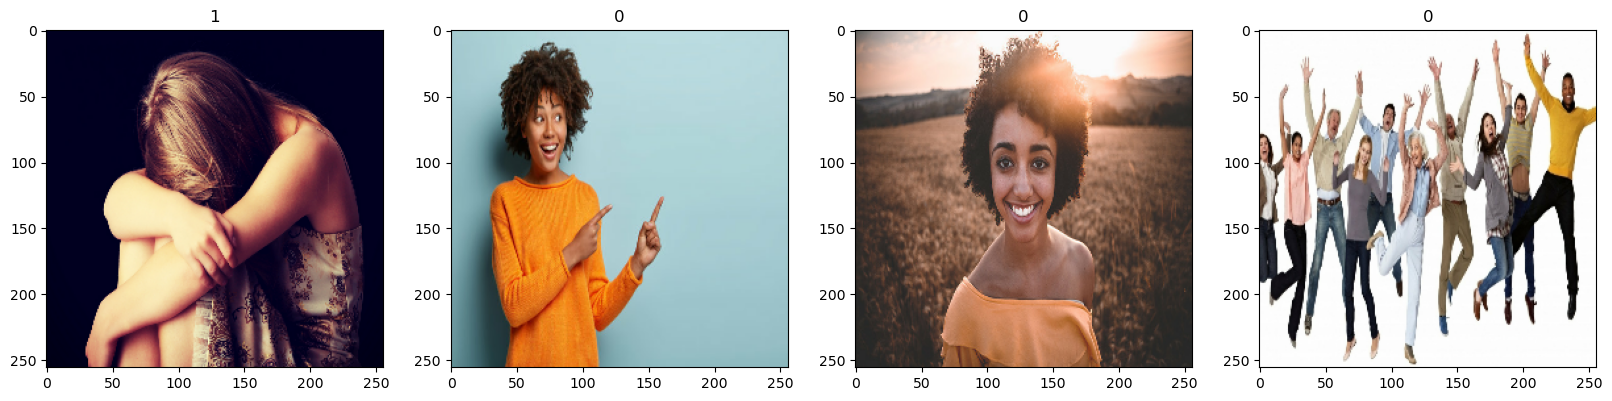

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Preprocess Data

### Scale Data

In [24]:
data = data.map(lambda x, y: (x / 255.0, y))  # Scale images to [0, 1]

In [25]:
data.as_numpy_iterator().next()[0].min()

0.0

### Split Data

In [26]:
len(data)

6

In [28]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [29]:
train_size

4

In [30]:
val_size

2

In [31]:
test_size

1

In [32]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Building Our Models

## CNN  model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import torch
import torchvision

In [39]:
# We Instantiate the Sequential model
NN_model_1 = Sequential()

# Add the layers as defined
NN_model_1.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
NN_model_1.add(MaxPooling2D())
#NN_model_1.add(Dropout(0.25))

NN_model_1.add(Conv2D(32, (3, 3), activation='relu'))
NN_model_1.add(MaxPooling2D())
#NN_model_1.add(Dropout(0.25))

NN_model_1.add(Conv2D(16, (3, 3), activation='relu'))
NN_model_1.add(MaxPooling2D())
#NN_model_1.add(Dropout(0.25))

NN_model_1.add(Flatten())
   
NN_model_1.add(Dense(256, activation='relu'))
#NN_model_1.add(Dropout(0.5))
NN_model_1.add(Dense(1, activation='sigmoid'))



In [40]:
# Compile the model
NN_model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
NN_model_1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [41]:
logdir = 'logs'

In [42]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [43]:
# Train the model with the profiler callback
history_1 = NN_model_1.fit(train, epochs=20, validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 17s 3s/step - loss: 0.8283 - accuracy: 0.5391 - val_loss: 0.6460 - val_accuracy: 0.6216
Epoch 2/20
4/4 [==============================] - 14s 3s/step - loss: 0.6165 - accuracy: 0.6328 - val_loss: 0.5810 - val_accuracy: 0.8649
Epoch 3/20
4/4 [==============================] - 13s 3s/step - loss: 0.5539 - accuracy: 0.7969 - val_loss: 0.4712 - val_accuracy: 0.8378
Epoch 4/20
4/4 [==============================] - 13s 3s/step - loss: 0.4636 - accuracy: 0.7969 - val_loss: 0.4179 - val_accuracy: 0.8378
Epoch 5/20
4/4 [==============================] - 14s 3s/step - loss: 0.3496 - accuracy: 0.8516 - val_loss: 0.2902 - val_accuracy: 0.8919
Epoch 6/20
4/4 [==============================] - 15s 3s/step - loss: 0.2695 - accuracy: 0.8906 - val_loss: 0.1715 - val_accuracy: 0.9459
Epoch 7/20
4/4 [==============================] - 14s 3s/step - loss: 0.2010 - accuracy: 0.9141 - val_loss: 0.1206 - val_accuracy: 0.9730
Epoch 8/20
4/4 [==================

### Plot Performance

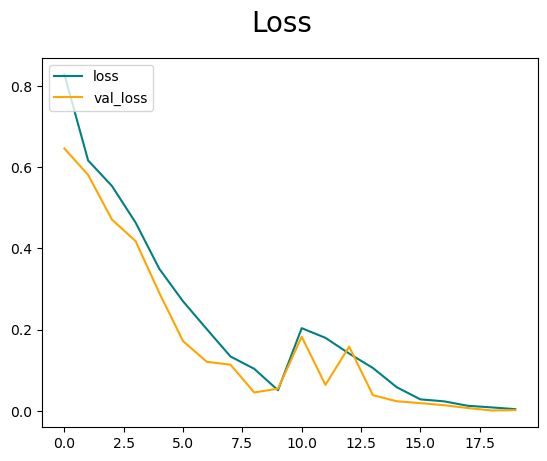

In [44]:
fig = plt.figure()
plt.plot(history_1.history['loss'], color='teal', label='loss')
plt.plot(history_1.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

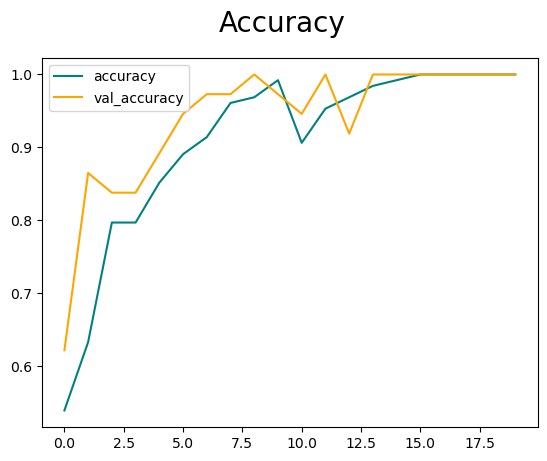

In [45]:
fig = plt.figure()
plt.plot(history_1.history['accuracy'], color='teal', label='accuracy')
plt.plot(history_1.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluate Performance

### Evaluate

In [47]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [48]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [49]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = NN_model_1.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [50]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [51]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision:0.0, Recall:0.0, Accuracy: 0.0


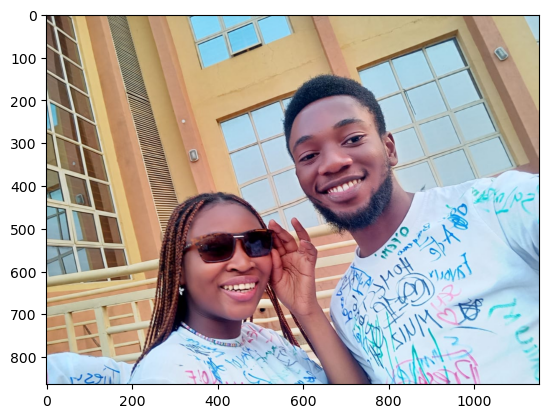

In [74]:
img = cv2.imread(r'C:\Users\ADMIN\Documents\MY_Whatsapp\WhatsApp Business Images\IMG-20220201-WA0072.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

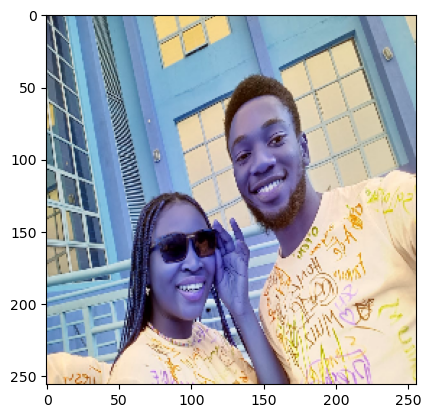

In [75]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [76]:
resize.shape

TensorShape([256, 256, 3])

In [77]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [78]:
yhat_1 = NN_model_1.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 232ms/step


In [79]:
yhat_1

array([[0.00637041]], dtype=float32)

In [80]:
if yhat_1 > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


-- This predicted accurately

# Saving our model

In [82]:
import joblib

In [83]:
# Save the stacking model to a file
model_filename = 'happy&sad_CNN.pkl'
joblib.dump(NN_model_1, model_filename)
print(f"CNN model saved as '{model_filename}'")


CNN model saved as 'happy&sad_CNN.pkl'


# RNN Model

In [99]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import fashion_mnist

In [113]:
# Define the RNN model
RNN_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [114]:
from tensorflow.keras.optimizers import Adam

# Compile the model
#optimizer = Adam(learning_rate=0.001)
# Compile the model
RNN_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [115]:
# Set up early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# Train the model
history = RNN_model.fit(train, epochs=20, validation_data=val,
                        callbacks=[early_stop])

Epoch 1/20
4/4 [==============================] - 23s 5s/step - loss: 2.6161 - accuracy: 0.5234 - val_loss: 0.5297 - val_accuracy: 0.7027
Epoch 2/20
4/4 [==============================] - 23s 5s/step - loss: 0.7401 - accuracy: 0.5234 - val_loss: 0.6456 - val_accuracy: 0.7568
Epoch 3/20
4/4 [==============================] - 22s 5s/step - loss: 0.6264 - accuracy: 0.7266 - val_loss: 0.7641 - val_accuracy: 0.4595
Epoch 4/20
4/4 [==============================] - 21s 5s/step - loss: 0.6012 - accuracy: 0.6797 - val_loss: 0.4907 - val_accuracy: 0.8378
Epoch 5/20
4/4 [==============================] - 24s 5s/step - loss: 0.5062 - accuracy: 0.7891 - val_loss: 0.4374 - val_accuracy: 0.7568
Epoch 6/20
4/4 [==============================] - 21s 5s/step - loss: 0.4028 - accuracy: 0.8281 - val_loss: 0.3155 - val_accuracy: 0.8919
Epoch 7/20
4/4 [==============================] - 23s 5s/step - loss: 0.3254 - accuracy: 0.8750 - val_loss: 0.3279 - val_accuracy: 0.7568
Epoch 8/20
4/4 [==================

## Plotting Performance

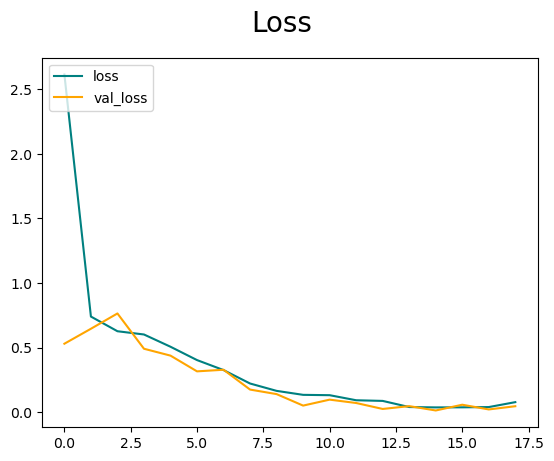

In [116]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

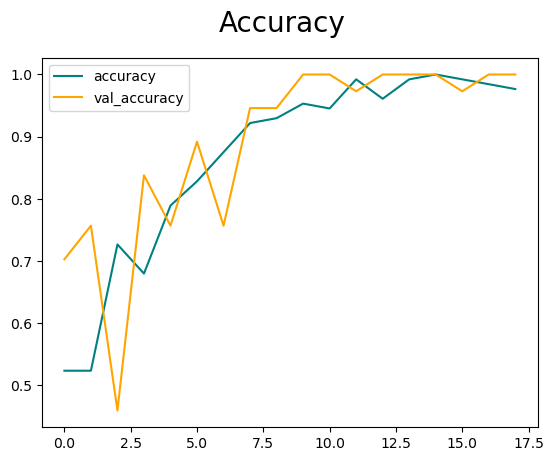

In [117]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Evaluate the model
score = RNN_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [118]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = RNN_model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [119]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [120]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision:0.0, Recall:0.0, Accuracy: 0.0


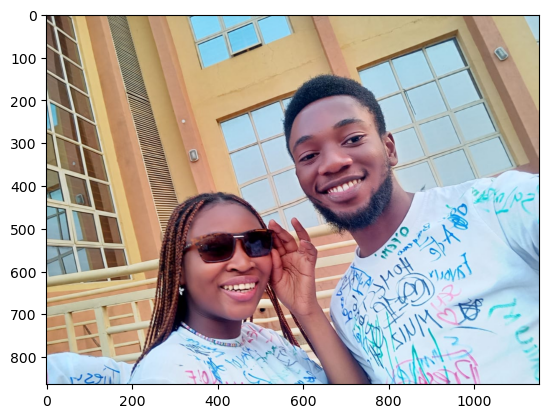

In [143]:
img = cv2.imread(r'C:\Users\ADMIN\Documents\MY_Whatsapp\WhatsApp Business Images\IMG-20220201-WA0072.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

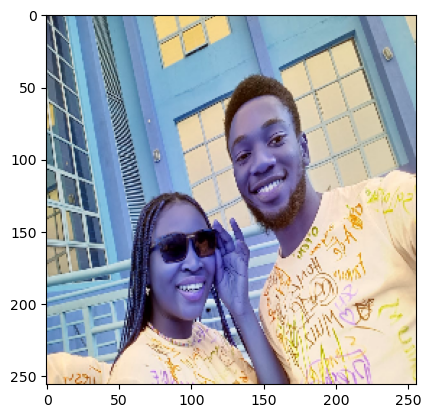

In [144]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [145]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [146]:
yhat_1 = RNN_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 255ms/step


In [147]:
yhat_1

array([[0.04174115]], dtype=float32)

In [148]:
if yhat_1 > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [149]:
# Save the stacking model to a file
model_filename = 'happy&sad_RNN.pkl'
joblib.dump(RNN_model, model_filename)
print(f"RNN model saved as '{model_filename}'")


RNN model saved as 'happy&sad_RNN.pkl'
